# Separating Flowers
This notebook explores a classic Machine Learning Dataset: the Iris flower dataset

## Tutorial goals
1. Explore the dataset
2. Build a simple predictive modeling
3. Iterate and improve your score


How to follow along:

    git clone https://github.com/dataweekends/pyladies_intro_to_data_science

    cd pyladies_intro_to_data_science
    
    ipython notebook

We start by importing the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1) Explore the dataset

#### Numerical exploration

- Load the csv file into memory using Pandas
- Describe each attribute
    - is it discrete?
    - is it continuous?
    - is it a number?
- Identify the target
- Check if any values are missing


Load the csv file into memory using Pandas

In [2]:
df = pd.read_csv('iris-2-classes.csv')

What's the content of ```df``` ?

In [3]:
df.iloc[[0,1,98,99]]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,iris_type
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
98,6.2,3.4,5.4,2.3,virginica
99,5.9,3.0,5.1,1.8,virginica


In [5]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,iris_type
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor


Describe each attribute (is it discrete? is it continuous? is it a number? is it text?)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
sepal_length_cm    100 non-null float64
sepal_width_cm     100 non-null float64
petal_length_cm    100 non-null float64
petal_width_cm     100 non-null float64
iris_type          100 non-null object
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


Quick stats on the features

In [6]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,100.000000,100.000000,100.000000,100.000000
mean,6.262000,2.872000,4.906000,1.676000
std,0.662834,0.332751,0.825578,0.424769
min,4.900000,2.000000,3.000000,1.000000
25%,5.800000,2.700000,4.375000,1.300000
50%,6.300000,2.900000,4.900000,1.600000
75%,6.700000,3.025000,5.525000,2.000000
max,7.900000,3.800000,6.900000,2.500000


#### Identify the target
What are we trying to predict?

ah, yes... the type of Iris flower!

In [7]:
df['iris_type'].value_counts()

virginica     50
versicolor    50
dtype: int64

Check if any values are missing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
sepal_length_cm    100 non-null float64
sepal_width_cm     100 non-null float64
petal_length_cm    100 non-null float64
petal_width_cm     100 non-null float64
iris_type          100 non-null object
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


#### Mental notes so far:

- Dataset contains 100 entries
- 1 Target column (```iris_type```)
- 4 Numerical Features
- No missing values

#### Visual exploration

- Distribution of Sepal Length, influence on target:

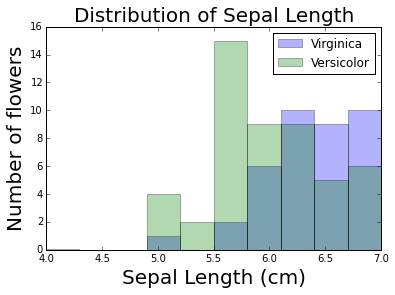

In [9]:
df[df['iris_type']=='virginica']['sepal_length_cm'].plot(kind='hist', bins = 10, range = (4,7),
                                                      alpha = 0.3, color = 'b')
df[df['iris_type']=='versicolor']['sepal_length_cm'].plot(kind='hist', bins = 10, range = (4,7),
                                                       alpha = 0.3, color = 'g')
plt.title('Distribution of Sepal Length', size = '20')
plt.xlabel('Sepal Length (cm)', size = '20')
plt.ylabel('Number of flowers', size = '20')
plt.legend(['Virginica', 'Versicolor'])
plt.show()

- Two features combined, scatter plot:

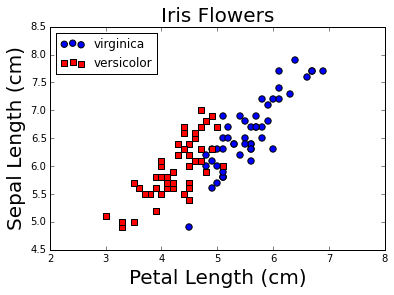

In [10]:
plt.scatter(df[df['iris_type']== 'virginica']['petal_length_cm'].values,
            df[df['iris_type']== 'virginica']['sepal_length_cm'].values, label = 'Virginica', c = 'b', s = 40)
plt.scatter(df[df['iris_type']== 'versicolor']['petal_length_cm'].values,
            df[df['iris_type']== 'versicolor']['sepal_length_cm'].values, label = 'Versicolor', c = 'r', marker='s',s = 40)
plt.legend(['virginica', 'versicolor'], loc = 2)
plt.title('Iris Flowers', size = '20')
plt.xlabel('Petal Length (cm)', size = '20')
plt.ylabel('Sepal Length (cm)', size = '20')
plt.show()

Ok, so, the flowers seem to have different characteristics

Let's build a simple model to test that

Define a new target column called ```target``` like this (map the string labels to binary):
- if ```iris_type = 'virginica'``` ===> ```target = 1```
- otherwise ```target = 0```

In [11]:
df['target'] = df['iris_type'].map({'virginica': 1, 'versicolor': 0})

print df[['iris_type', 'target']].head(2)
print
print df[['iris_type', 'target']].tail(2)

    iris_type  target
0  versicolor       0
1  versicolor       0

    iris_type  target
98  virginica       1
99  virginica       1


Define simplest model as benchmark

The simplest model is a model that predicts 0 for everybody, i.e. all versicolor.

How good is it?

In [12]:
df['target'].value_counts()

1    50
0    50
dtype: int64

If I predict every flower is Versicolor, I'm correct 50% of the time. Thus, accuracy of dumbest possible model is 50%

We need to do better than that

Define features (X) and target (flower type) (y) variables

In [18]:
X = df[['sepal_length_cm', 'sepal_width_cm',
        'petal_length_cm', 'petal_width_cm']]
y = df['target']

Initialize a decision Decision Tree model. sklearn has machine learning models built in.

In [20]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=0, splitter='best')

 Split the features and the target into a Train and a Test subsets.
 
 Ratio should be 70/30

In [21]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size = 0.3, random_state=0)

Train the model

In [22]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=0, splitter='best')

Calculate the model score

In [23]:
my_score = model.score(X_test, y_test)

print "Classification Score: %0.2f" % my_score

Classification Score: 0.90


Print the confusion matrix. how many predicted positive correctly (0,0); predicted positive incorrectly (0,1); negative incorrectly (1,0); negative correctly (1,1)

In [24]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

print "\n=======confusion matrix=========="
print confusion_matrix(y_test, y_pred)


=======confusion matrix==========
[[12  3]
 [ 0 15]]


### 3) Iterate and improve
Start from:

    > python iris_starter_script.py
    
It's a basic pipeline. How can you improve the score? Try:
- [Changing the model parameters](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
  
- [Using a different model](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
  
Next Steps: try separating 3 classes instead of 2 (```iris.csv``` provided)